In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import itertools
import numpy as np
import matplotlib.pyplot as plt

#from sklearn import knn, datasets
from sklearn.model_selection import train_test_split

from collections import Counter

from imblearn.datasets import make_imbalance
#from imblearn.under_sampling import NearMiss
#from imblearn.pipeline import make_pipeline
#from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv('Data/finaldata/twoclassleft.csv')

In [6]:
df.shape

(45569, 27)

In [7]:
#df.head()

In [8]:
df.groupby(['class']).size()

class
0    42516
1     3053
dtype: int64

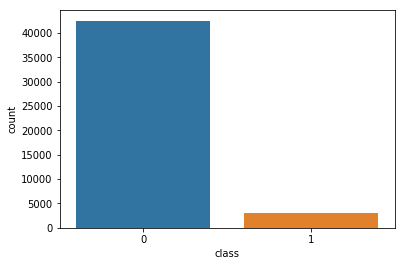

In [9]:
sns.countplot("class",data=df)

In [10]:
array = df.values
X = array[:,1:26]
y = array[:,26]
validation_size = 0.10
seed = 7
scoring = 'accuracy'

In [12]:
print(__doc__)

RANDOM_STATE = 42

# Create a folder to fetch the dataset

X, y = make_imbalance(X, y,
                      sampling_strategy={0: 42516, 1: 3053},
                   random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Automatically created module for IPython interactive environment
Training target statistics: Counter({0.0: 31870, 1.0: 2306})
Testing target statistics: Counter({0.0: 10646, 1.0: 747})


# Normal method

In [13]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
#The best model is LR in this case


LR: 0.932233 (0.004231)
LDA: 0.930536 (0.004300)
KNN: 0.927610 (0.004575)
CART: 0.872630 (0.006780)
NB: 0.864057 (0.004425)


In [16]:
# Make predictions on validation dataset
LR = LogisticRegression()
LR.fit(X_train, y_train)
#predictions = LR.predict(X_test)
y_pred=LR.predict(X_test)
class_names =['0','1']
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9339067848679014
[[10631    15]
 [  738     9]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10646
         1.0       0.38      0.01      0.02       747

   micro avg       0.93      0.93      0.93     11393
   macro avg       0.66      0.51      0.49     11393
weighted avg       0.90      0.93      0.90     11393



Confusion matrix, without normalization
[[10631    15]
 [  738     9]]
Normalized confusion matrix
[[1.   0.  ]
 [0.99 0.01]]


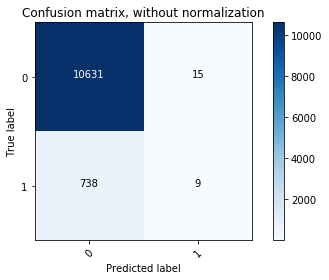

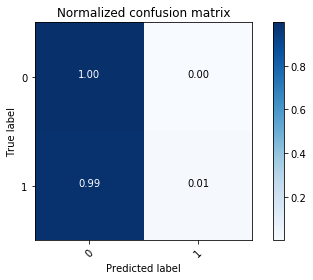

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Controlled under-sampling techniques-Near Miss

In [14]:
#Mathematical formulation  https://imbalanced-learn.org/en/stable/under_sampling.html#mz2003
#Let positive samples be the samples belonging to the targeted class to be under-sampled. Negative sample refers 
#to the samples from the minority class (i.e., the most under-represented class).

In [15]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
X_nm, y_nm = nm1.fit_resample(X, y)
print(sorted(Counter(y_nm).items()))


[(0.0, 914), (1.0, 914), (2.0, 914), (3.0, 914), (4.0, 914), (5.0, 914)]


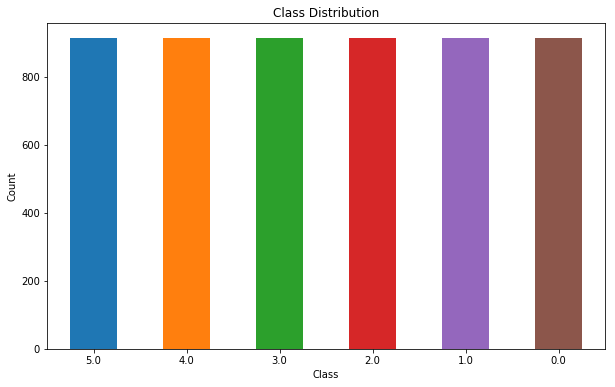

In [16]:
count_classes = pd.value_counts(y_nm, sort = True)
count_classes.plot(kind = 'bar', rot=0, figsize=(10,6))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count");


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_nm, y_nm, random_state=RANDOM_STATE)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({3.0: 701, 5.0: 696, 4.0: 691, 1.0: 683, 2.0: 683, 0.0: 659})
Testing target statistics: Counter({0.0: 255, 2.0: 231, 1.0: 231, 4.0: 223, 5.0: 218, 3.0: 213})


In [18]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
#The best model is LR in this case


LR: 0.545100 (0.018097)
LDA: 0.515922 (0.013827)
KNN: 0.392421 (0.019254)
CART: 0.438380 (0.022919)
NB: 0.535624 (0.018022)


In [19]:
# Make predictions on validation dataset
LR = LogisticRegression()
LR.fit(X_train, y_train)
#predictions = LR.predict(X_test)
y_pred=LR.predict(X_test)
class_names =['0','1','2','3','4','5']
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5317286652078774
[[151   8   0  44  10  42]
 [ 26 105  23  17  37  23]
 [  2  26 145  14  26  18]
 [  0   9   0 123  45  36]
 [  0  33  19  65  80  26]
 [  2  16   8  39  28 125]]
              precision    recall  f1-score   support

         0.0       0.83      0.59      0.69       255
         1.0       0.53      0.45      0.49       231
         2.0       0.74      0.63      0.68       231
         3.0       0.41      0.58      0.48       213
         4.0       0.35      0.36      0.36       223
         5.0       0.46      0.57      0.51       218

   micro avg       0.53      0.53      0.53      1371
   macro avg       0.56      0.53      0.54      1371
weighted avg       0.56      0.53      0.54      1371



Confusion matrix, without normalization
[[151   8   0  44  10  42]
 [ 26 105  23  17  37  23]
 [  2  26 145  14  26  18]
 [  0   9   0 123  45  36]
 [  0  33  19  65  80  26]
 [  2  16   8  39  28 125]]
Normalized confusion matrix
[[0.59 0.03 0.   0.17 0.04 0.16]
 [0.11 0.45 0.1  0.07 0.16 0.1 ]
 [0.01 0.11 0.63 0.06 0.11 0.08]
 [0.   0.04 0.   0.58 0.21 0.17]
 [0.   0.15 0.09 0.29 0.36 0.12]
 [0.01 0.07 0.04 0.18 0.13 0.57]]


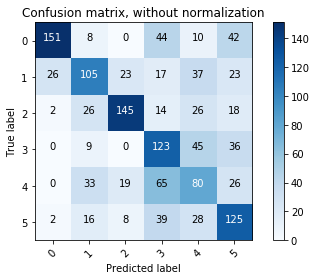

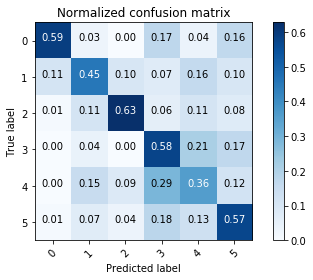

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Instance hardness threshold

In [21]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=0,
                                estimator=LogisticRegression(
                                solver='lbfgs', multi_class='auto'))
X_resampled, y_resampled = iht.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))


[(0.0, 914), (1.0, 914), (2.0, 914), (3.0, 914), (4.0, 914), (5.0, 914)]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
   X_resampled, y_resampled, random_state=RANDOM_STATE)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({3.0: 701, 5.0: 696, 4.0: 691, 1.0: 683, 2.0: 683, 0.0: 659})
Testing target statistics: Counter({0.0: 255, 2.0: 231, 1.0: 231, 4.0: 223, 5.0: 218, 3.0: 213})


In [23]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC())) take too long time https://stats.stackexchange.com/questions/345717/why-does-my-svm-take-so-long-to-run
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
#The best model is LR in this case


LR: 0.727201 (0.026538)
LDA: 0.657909 (0.027712)
KNN: 0.516182 (0.027024)
CART: 0.560430 (0.020380)
NB: 0.580355 (0.023535)


In [24]:
# Make predictions on validation dataset
LR = LogisticRegression()
LR.fit(X_train, y_train)
#predictions = LR.predict(X_test)
y_pred=LR.predict(X_test)
class_names =['0','1','2','3','4','5']
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7337709700948213
[[254   0   1   0   0   0]
 [  2 163  43   0  16   7]
 [  4  55 100   3  32  37]
 [  0   3   0 197  12   1]
 [  0  26   6  49 121  21]
 [  0  12  20   4  11 171]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       255
         1.0       0.63      0.71      0.67       231
         2.0       0.59      0.43      0.50       231
         3.0       0.78      0.92      0.85       213
         4.0       0.63      0.54      0.58       223
         5.0       0.72      0.78      0.75       218

   micro avg       0.73      0.73      0.73      1371
   macro avg       0.72      0.73      0.72      1371
weighted avg       0.73      0.73      0.73      1371



Confusion matrix, without normalization
[[254   0   1   0   0   0]
 [  2 163  43   0  16   7]
 [  4  55 100   3  32  37]
 [  0   3   0 197  12   1]
 [  0  26   6  49 121  21]
 [  0  12  20   4  11 171]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.01 0.71 0.19 0.   0.07 0.03]
 [0.02 0.24 0.43 0.01 0.14 0.16]
 [0.   0.01 0.   0.92 0.06 0.  ]
 [0.   0.12 0.03 0.22 0.54 0.09]
 [0.   0.06 0.09 0.02 0.05 0.78]]


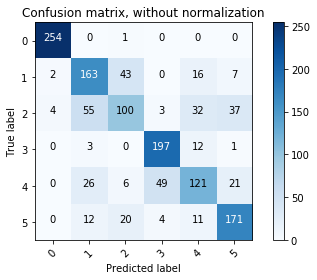

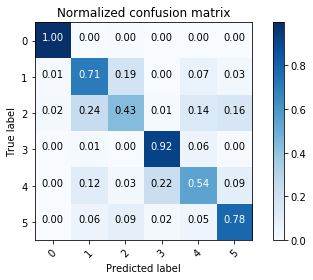

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
# perform predictions on test set
actual=y_test
predictions=LR.predict(X_test)


In [27]:
#confusion_matrix(actual,predictions)

In [28]:
cm = confusion_matrix(actual, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

In [29]:
np.mean(recall)


0.7310822942657377

In [30]:
np.mean(precision)

0.7208142412569454

In [31]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("Data/finaldata/sixLeft.csv")
df1=df.drop(['hadm_id'], axis=1)
corr=df1.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,gender,los,ccs_id,resp_mean,glucose_min,hr_mean,sysbp_mean,diasbp_mean,temp_mean,sp02,albumin,calcium,hemoglobin,urea,wbc,magnesium,sodium,duration_hours,had_surg,pain,sapsii,sofa,angus,GCS,class
age,1,-0.082,0.012,-0.18,0.11,0.022,-0.19,0.004,-0.34,-0.23,-0.11,-0.13,-0.062,-0.17,0.29,0.038,0.15,0.063,-0.013,0.013,-0.11,0.5,0.13,0.11,-0.0055,0.02
gender,-0.082,1,0.00068,0.046,-0.031,0.0026,-0.034,0.006,0.15,0.04,-0.0035,0.041,-0.035,0.17,0.081,-0.012,0.071,-0.03,0.00097,0.055,0.0086,-0.04,0.053,-0.045,-0.032,0.0013
los,0.012,0.00068,1,-0.027,0.2,-0.33,0.065,-0.0023,-0.064,0.18,0.024,-0.29,-0.081,-0.21,0.19,0.082,0.069,0.061,0.82,0.089,0.11,0.26,0.29,0.38,-0.094,-0.12
ccs_id,-0.18,0.046,-0.027,1,-0.076,0.02,0.0066,0.084,0.12,0.048,0.043,0.053,0.011,0.082,-0.097,-0.045,-0.089,0.032,-0.017,-0.069,0.0017,-0.16,-0.087,-0.1,0.0038,-0.018
resp_mean,0.11,-0.031,0.2,-0.076,1,-0.03,0.24,-0.018,-0.019,0.14,-0.2,-0.16,-0.058,-0.089,0.096,0.1,0.054,0.06,0.18,-0.11,-0.06,0.18,0.14,0.21,0.034,-0.045
glucose_min,0.022,0.0026,-0.33,0.02,-0.03,1,-0.033,0.075,0.1,-0.057,-0.07,0.12,0.08,0.18,-0.12,-0.016,-0.052,0.01,-0.27,-0.16,-0.13,-0.17,-0.24,-0.16,0.083,0.1
hr_mean,-0.19,-0.034,0.065,0.0066,0.24,-0.033,1,-0.071,0.17,0.24,-0.038,-0.067,-0.095,-0.1,-0.086,0.072,-0.081,-0.064,0.058,0.048,0.073,-0.032,0.059,0.072,-0.054,-0.033
sysbp_mean,0.004,0.006,-0.0023,0.084,-0.018,0.075,-0.071,1,0.52,0.1,0.085,0.069,0.13,0.089,0.014,-0.02,-0.039,0.084,-0.017,-0.049,-0.034,-0.15,-0.16,-0.072,0.03,-0.014
diasbp_mean,-0.34,0.15,-0.064,0.12,-0.019,0.1,0.17,0.52,1,0.038,0.036,0.12,0.11,0.23,-0.18,-0.068,-0.067,0.016,-0.065,-0.12,-0.13,-0.28,-0.19,-0.081,-0.065,0.11
temp_mean,-0.23,0.04,0.18,0.048,0.14,-0.057,0.24,0.1,0.038,1,0.091,0.021,-0.074,-0.012,-0.19,0.036,-0.082,0.059,0.23,0.12,0.13,-0.13,-0.037,0.04,-0.0059,-0.098
